<span style="color:purple; font-weight:bold">Projet de Sihem Yenbou et Güney Naz Tümüklü</span>

In [2]:
import pandas as pd
import numpy as np

In [4]:
energydata=pd.read_csv('energydata_complete.csv')

In [6]:
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
print(energydata)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.0

In [10]:
energydata.size

572315

<span style="color:blue">Analyse descriptives des données</span><br>

## Présentation de la base de données

La base de données utilisée comporte **19735 lignes** et **29 colonnes**, soit un total de **572 315 données**.

Chaque colonne représente une variable mesurée, telles que la température, l'humidité, et d'autres paramètres météorologiques.

Nous disposons ainsi de **29 variables** :

- **Ti (i allant de 1 à 9)** : température mesurée dans différentes pièces du bâtiment.
- **To** et **T6** : températures extérieures.
- **RH_i (i allant de 1 à 9)** : humidité relative mesurée dans plusieurs pièces du bâtiment.
- **RH_out** et **RH_6** : humidité relative extérieure.
- **Autres facteurs météorologiques** : vitesse du vent, pression atmosphérique, point de rosée, etc.
- **Variables aléatoires rv1 et rv2** : ces deux variables serviront principalement à tester la robustesse du modèle de régression choisi et implémenté.



<span style="color:green">La colonne Appliances représente l'énergie utilisée en Wh (Watt par heure), c'est notre cible.</span>

<span style="color:black">Les lignes représentent la date et l'heure à laquelle la température et l'humidité de chaque pièce/endroit a été mesuré.</span>

<span style="color:black">Ces mesures ont été collectées toutes les 10 minutes pendant environ 4,5 mois.</span>

In [16]:
import matplotlib as plt

<span style="color:blue">separer les observations en deux datasets le premiers pour analyse(l'entrainement) ou on prends que les 15000 premiers inputs
et observtions 
le deuxieme pour le teste ou on prends les 4753 restants</span><br>

In [19]:
#Séparation des données en données d'entraînement et de validation pour la comparaison des méthodes
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(energydata.iloc[:,2:])

np.shape(X)

(19735, 27)

In [20]:
nbdatatrain=15000
#les observations pour l'entrainement et les observations pour le test
Y_train = energydata.iloc[:nbdatatrain,1] 
Y_test  = energydata.iloc[nbdatatrain:,1] 
Y_test.head()

15000     90
15001    110
15002     90
15003     90
15004     80
Name: Appliances, dtype: int64

In [23]:
# the features
X_train = X[:nbdatatrain,:] 
X_test  = X[nbdatatrain:,:] 
np.shape(X_test)

(4735, 27)

## Régression linéaire sans pénalisation

Le modèle de régression linéaire classique (sans pénalisation) s’écrit sous la forme :

$
Y = X \beta + \varepsilon
$

où :

- ($ Y \in \mathbb{R}^n $) représente la consommation d’énergie (notre variable cible),
- ($ X \in \mathbb{R}^{n \times d} $) est la matrice des variables explicatives (température, humidité, tension, intensité, etc.),
- ($ \beta \in \mathbb{R}^d $) est le vecteur des coefficients à estimer,
- ($ \varepsilon $) est le terme d’erreur.

L’estimation de ($ \beta $) est obtenue en minimisant l’erreur quadratique moyenne (MSE) :

$$
\widehat{\beta} = \underset{\beta \in \mathbb{R}^d}{\arg\min} \, \frac{1}{n} \|Y - X\beta\|_2^2
$$

Cette méthode ne dépend pas d'hyperparamètre.

<span style="color:red; font-weight:bold">Présentation de la régression Lasso avec pénalisation et des hyperparamètres dont elle dépend</span>

## Régression Lasso avec pénalisation

Dans ce projet, nous cherchons à prédire la consommation d’énergie des appareils ménagers (colonne `Appliances`, exprimée en Wh) à partir de variables environnementales et électriques mesurées dans un foyer.

La régression Lasso (Least Absolute Shrinkage and Selection Operator) est une méthode de régression linéaire pénalisée, qui permet à la fois d’améliorer la performance du modèle en réduisant le surapprentissage et de réaliser une sélection automatique de variables en annulant certains coefficients.

Le modèle s’écrit sous la forme suivante :
$
Y = X \beta + \varepsilon,
$
où :
- ($ Y \in \mathbb{R}^n $) représente la consommation d’énergie (notre variable cible),
- ($ X \in \mathbb{R}^{n \times d} $) est la matrice des variables explicatives (température, humidité, tension, intensité, etc.),
- ($ \beta \in \mathbb{R}^d $) est le vecteur des coefficients à estimer,
- ($ \varepsilon $) est le terme d’erreur.

Ici n = 15000 et d = 27.

L’estimateur Lasso consiste à minimiser la fonction de coût suivante :
$
\widehat{\beta} = \underset{\beta \in \mathbb{R}^d}{\arg\min} \left( \frac{1}{n} \| Y - X\beta \|_2^2 + \lambda \| \beta \|_1 \right),
$
où :
- $\| Y - X\beta \|_2^2 $ est l’erreur quadratique moyenne (MSE),
- $\| \beta \|_1 $ est la norme L1 (somme des valeurs absolues des coefficients),
- $\lambda > 0 $ est un **hyperparamètre** qui contrôle l’intensité de la pénalisation.

### Choix de l’hyperparamètre $\lambda $

- Si $\lambda $ est trop petit : le modèle est peu régularisé, risque de surapprentissage.
- Si $\lambda $ est trop grand : trop de coefficients sont annulés, perte d’information.

Pour choisir une valeur optimale de $\lambda$, nous utilisons la **validation croisée**. Cela permet de tester différentes valeurs de $\lambda$ et de sélectionner celle qui minimise l’erreur de prédiction sur des données non vues (`X_test`et `Y_test`).

<span style="color:red; font-weight:bold">Discussion sur les choix d'implémentation et l'influence des différents paramètres sur les résultats</span>

<span style="font-size:14px;">
La <span style="color:blue;"><strong>pénalisation L1</strong></span>, utilisée dans la régression <span style="color:blue;"><strong>Lasso</strong></span>, permet de réduire le surapprentissage en limitant la complexité du modèle. Ce choix est particulièrement pertinent ici, compte tenu du nombre relativement élevé de variables (<span style="color:darkorange;"><strong>27</strong></span>).

La régression Lasso est également bien adaptée aux problèmes de prédiction comportant des variables redondantes ou peu informatives, en réalisant automatiquement une sélection des variables les plus pertinentes.

Par ailleurs, les données ont été <span style="color:green;"><strong>normalisées</strong></span> afin que toutes les variables soient sur la même échelle. Cette étape est essentielle, car la pénalisation L1 est sensible à l'échelle des variables : <span style="color:red;"><em>sans normalisation</em></span>, certaines variables pourraient être favorisées de manière artificielle lors de la sélection.
</span>


<span style="color:blue; font-weight:bold">Implémentation d'une regression LASSO avec la pénalisation avec la module scikit_learn:</span><br>

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
from sklearn.metrics import mean_squared_error

In [30]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

<span style="color:blue">Creation d'un array avec multiples valeurs de lambda (le parametre de pénalisation)</span><br>

In [33]:
n_alphas = 100
alphas = np.logspace(-2, 1, n_alphas)

In [35]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [37]:
#Pour chaque valeur de lambda on applique la regression de LASSO
lasso = Lasso(max_iter=100)  
coefs = []
nb_zeros = []
rmse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))
    y_hat = lasso.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))

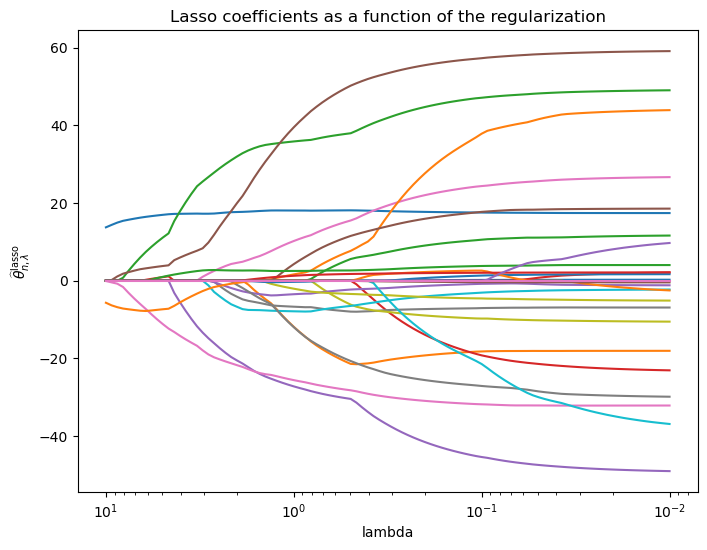

In [38]:
#Visualisation de l'estimateur theta_chapeau_lambda par rapport aux valeurs differentes de lambda
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel(r'$\widehat\theta^{\mathrm{lasso}}_{n,\lambda}$')
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

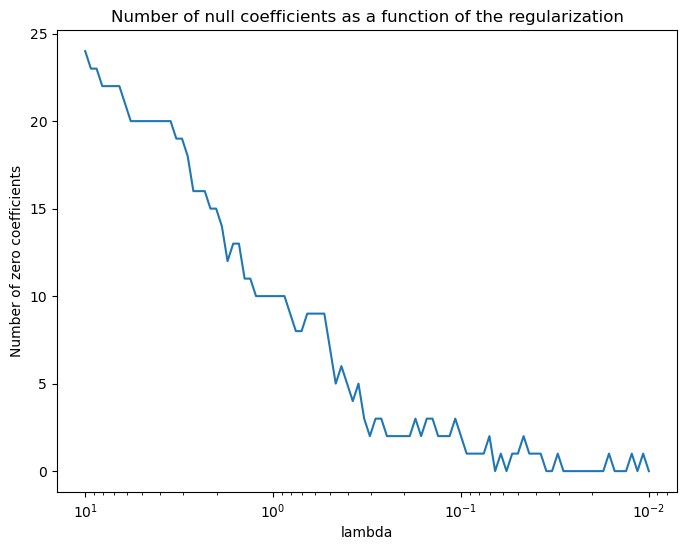

In [41]:
#Visualitation de nombre des coéfficients de theta_chapeau_lambda qui sont réduite a zero avec la pénalisation lambda
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, nb_zeros)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Number of zero coefficients')
plt.title("Number of null coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

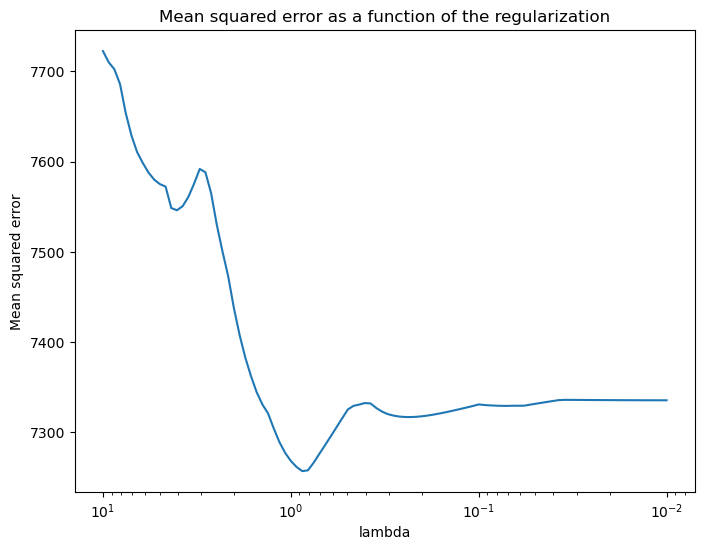

In [43]:
#visualisation de l’erreur quadratique moyenne (MSE, Mean Squared Error) entre les prédictions et les vraies observations, 
#en fonction de différentes valeurs de λ (lambda)
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, rmse) 
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Mean squared error')
plt.title("Mean squared error as a function of the regularization")
plt.axis("tight")
plt.show()

<span style="color:blue">Validation croisée K-Fold pour choisir le meuilleur lambda:</span><br>

In [45]:
# K-fold cross-validation
from sklearn.model_selection import KFold
lasso = Lasso(max_iter=100)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mse_cv = [] #moyenne de erreur en moyenne quadratique pour chaque lambda
for a in alphas:
    mse_fold = []

    for train_index, val_index in kf.split(X_train):
        X_t, X_val = X_train[train_index], X_train[val_index]
        Y_t, Y_val = Y_train[train_index], Y_train[val_index]
        lasso.set_params(alpha=a)
        lasso.fit(X_t, Y_t)
        Y_pred = lasso.predict(X_val)
        mse = mean_squared_error(Y_val, Y_pred)
        mse_fold.append(mse)
    mse_cv.append(np.mean(mse_fold))




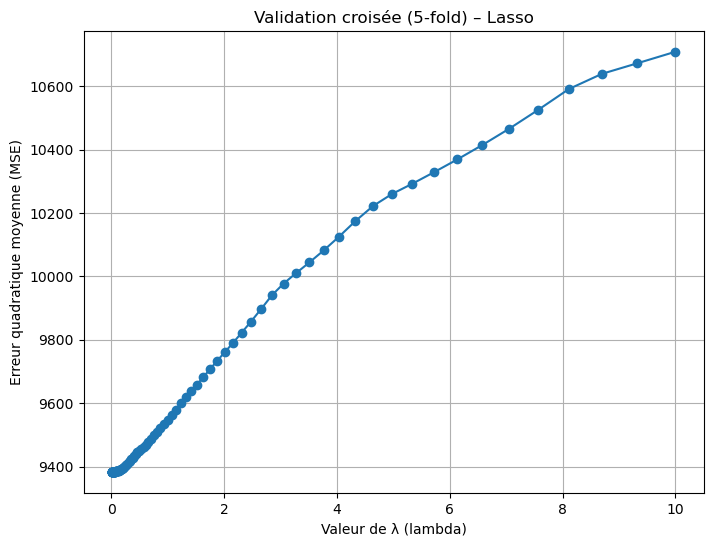

In [46]:
# Affichage du résultat
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_cv, marker='o')

plt.xlabel("Valeur de λ (lambda)")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title(f"Validation croisée ({k}-fold) – Lasso")
plt.grid(True)
plt.show()


In [49]:
# Choix du meilleur lambda
best_alpha = alphas[np.argmin(mse_cv)]
print("Meilleur lambda :", best_alpha)


Meilleur lambda : 0.046415888336127795


In [51]:
#Ré-trainer le modele avec le lambda obtenu grace a la validation croisée
final_model = Lasso(alpha=best_alpha, max_iter=100)
final_model.fit(X_train, Y_train)
y_test_pred = final_model.predict(X_test)


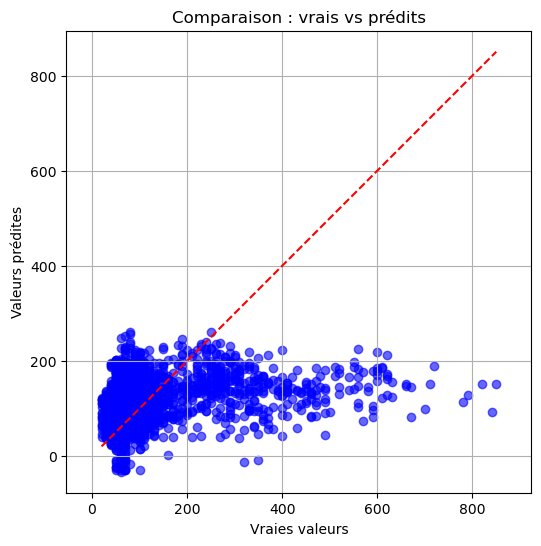

In [53]:
#Visualisation de la qualité des prédictions
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Vraies valeurs")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison : vrais vs prédits")
plt.grid(True)
plt.axis('equal')
plt.show()

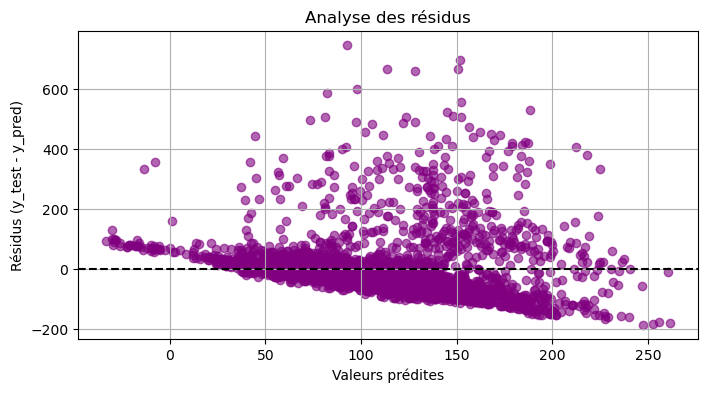

In [55]:
#visualisation des résidues

residuals = Y_test - y_test_pred

plt.figure(figsize=(8, 4))
plt.scatter(y_test_pred, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (y_test - y_pred)")
plt.title("Analyse des résidus")
plt.grid(True)
plt.show()

<span style="color:green">Possible piste d'amélioration: temps d'éxécution trop longue en python </span>


<span style="color:blue">La validation croisée K-Fold automatique avec sckit-learn:</span>


In [59]:
#plotting cross validation predictions
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lasso, X_train, Y_train, cv=100)

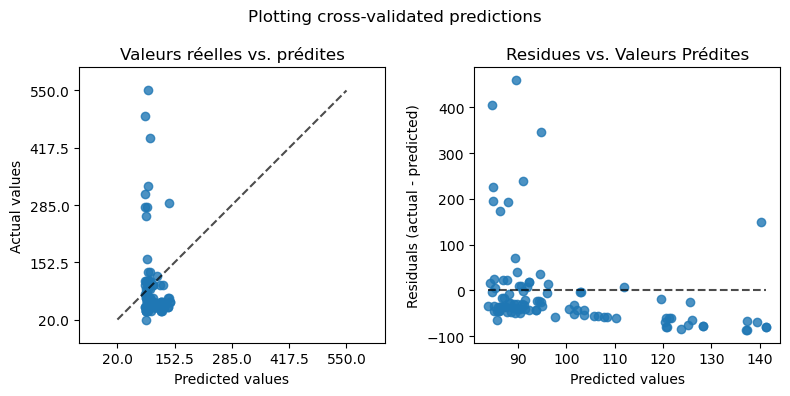

In [60]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(
    Y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Valeurs réelles vs. prédites")
PredictionErrorDisplay.from_predictions(
    Y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residues vs. Valeurs Prédites")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

<span style="color:blue">Les prédictions obtenues sont éloignées des valeurs réelles, ce qui indique une erreur de prédiction relativement élevée.</span><br>

## Comment améliorer les résultats ?

L'objectif est de réduire l'erreur de prédiction, c'est-à-dire l'écart entre les valeurs prédites et les valeurs observées sur l'ensemble de test.

### 1. Agir sur le modèle
- **Choix de λ (régularisation)** : utiliser une validation croisée avec un plus grand nombre de plis (par exemple un K-fold avec \( K > 5 \)).
- **Tuning des hyperparamètres** : augmenter `max_iter` pour permettre au modèle de mieux converger (attention aux limites de puissance de calcul).
- **Analyse des erreurs** : identifier les zones où le modèle se trompe le plus, et éventuellement créer un modèle spécialisé pour ces cas particuliers.

### 2. Travailler sur les variables (features)
- **Analyser les dépendances** : certaines relations complexes entre les variables peuvent être cachées et ne pas être capturées par un modèle linéaire.
- **Sélection de variables** : supprimer les variables inutiles ou redondantes en utilisant des outils comme `sklearn.feature_selection`.

### 3. Revoir la complexité du modèle
- Un modèle linéaire peut être insuffisant pour des données complexes.  
- Envisager l'utilisation de modèles non linéaires tels que des **réseaux de neurones**.

